In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, cholesky

In [2]:
def rbf_kernel(x1, x2, length_scale=1.0, variance=1.0):
    """
    Compute the RBF kernel between two inputs.
    Args:
        x1: First input (array).
        x2: Second input (array).
        length_scale: Length scale parameter (controls smoothness).
        variance: Variance parameter (controls amplitude).
    Returns:
        Kernel matrix.
    """
    x1 = x1[:, None]  # Ensure x1 is a column vector
    x2 = x2[None, :]  # Ensure x2 is a row vector
    sqdist = (x1 - x2)**2
    return variance * np.exp(-0.5 * sqdist / length_scale**2)

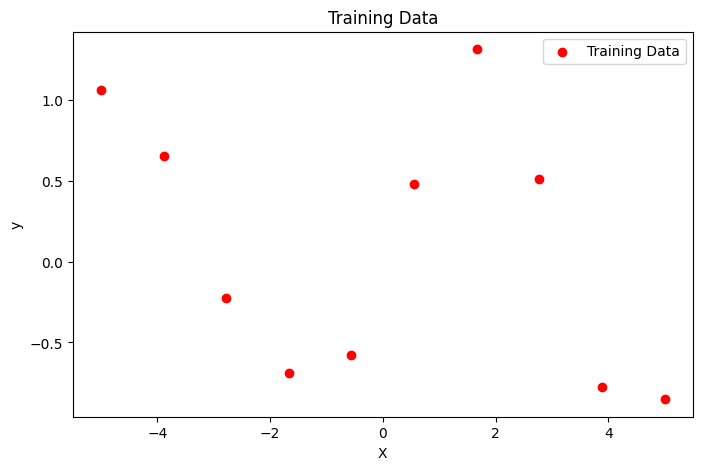

In [3]:
# Generate training data
np.random.seed(42)
X_train = np.linspace(-5, 5, 10)  # Training inputs
y_train = np.sin(X_train) + 0.2 * np.random.randn(len(X_train))  # Noisy observations

# Plot the training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Training Data')
plt.show()

In [4]:
# Define test points
X_test = np.linspace(-10, 10, 100)  # Test inputs

In [5]:
# Hyperparameters for the kernel
length_scale = 1.0
variance = 1.0

# Compute covariance matrices
K = rbf_kernel(X_train, X_train, length_scale, variance)  # K(X, X)
K_s = rbf_kernel(X_test, X_train, length_scale, variance)  # K(X_*, X) = K(X, X_*)^T
K_ss = rbf_kernel(X_test, X_test, length_scale, variance)  # K(X_*, X_*)

# Add small jitter term for numerical stability as we need to invert K
noise_variance = 0.2**2
K += noise_variance * np.eye(len(X_train))

In [6]:
# Compute the posterior mean
K_inv = inv(K)  # Inverse of the covariance matrix
mu_s = K_s @ K_inv @ y_train  # Posterior mean

# Compute the posterior covariance
cov_s = K_ss - K_s @ K_inv @ K_s.T

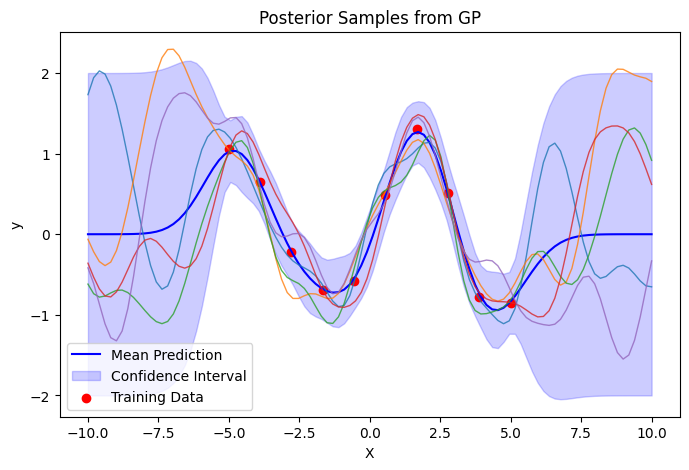

In [7]:
# Sample functions from the posterior
num_samples = 5
samples = np.random.multivariate_normal(mu_s, cov_s, num_samples)

# Plot the posterior samples
plt.figure(figsize=(8, 5))
plt.plot(X_test, mu_s, label='Mean Prediction', color='blue')
plt.fill_between(X_test, 
                 mu_s - 2 * np.sqrt(np.diag(cov_s)), 
                 mu_s + 2 * np.sqrt(np.diag(cov_s)), 
                 color='blue', alpha=0.2, label='Confidence Interval')
for i in range(num_samples):
    plt.plot(X_test, samples[i], lw=1, alpha=0.8)
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Posterior Samples from GP')
plt.show()